In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
df=pd.read_csv('neo.csv')

In [3]:
df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [5]:
df.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
for column in df.columns:
    print("Unique COlumns :",column)
    print(df[column].unique())
    print()

Unique COlumns : id
[ 2162635  2277475  2512244 ... 54225015  3735178  3092229]

Unique COlumns : name
['162635 (2000 SS164)' '277475 (2005 WK4)' '512244 (2015 YE18)' ...
 '(2021 WR3)' '(2015 VK142)' '(1999 LV7)']

Unique COlumns : est_diameter_min
[1.1982708  0.2658     0.72202956 ... 0.05602153 0.04526421 0.10913272]

Unique COlumns : est_diameter_max
[2.67941497 0.59434687 1.61450717 ... 0.12526795 0.10121386 0.24402818]

Unique COlumns : relative_velocity
[ 13569.24922418  73588.7266635  114258.69212905 ...   7566.80773249
  69199.15448351  27024.45555273]

Unique COlumns : miss_distance
[54839744.08284605 61438126.52395093 49798724.94045679 ...
 28400768.1610167  68692060.5345607  59772130.59268528]

Unique COlumns : orbiting_body
['Earth']

Unique COlumns : sentry_object
[False]

Unique COlumns : absolute_magnitude
[16.73  20.    17.83  ... 23.381 23.844 21.933]

Unique COlumns : hazardous
[False  True]



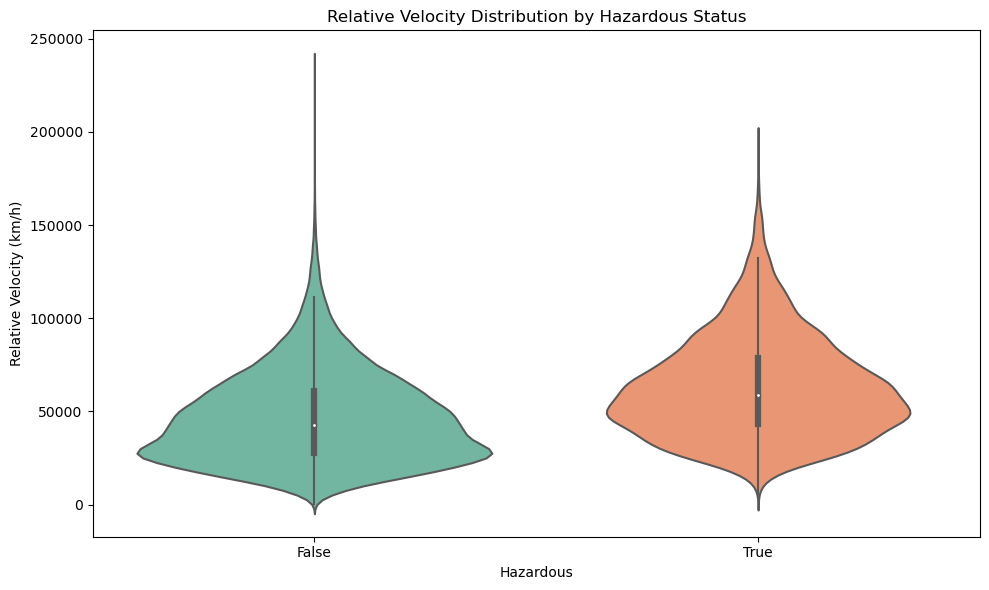

In [8]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='hazardous', y='relative_velocity', palette="Set2")
plt.title('Relative Velocity Distribution by Hazardous Status')
plt.xlabel('Hazardous')
plt.ylabel('Relative Velocity (km/h)')
plt.tight_layout()
plt.savefig("violin_velocity_hazardous.png")
plt.show()

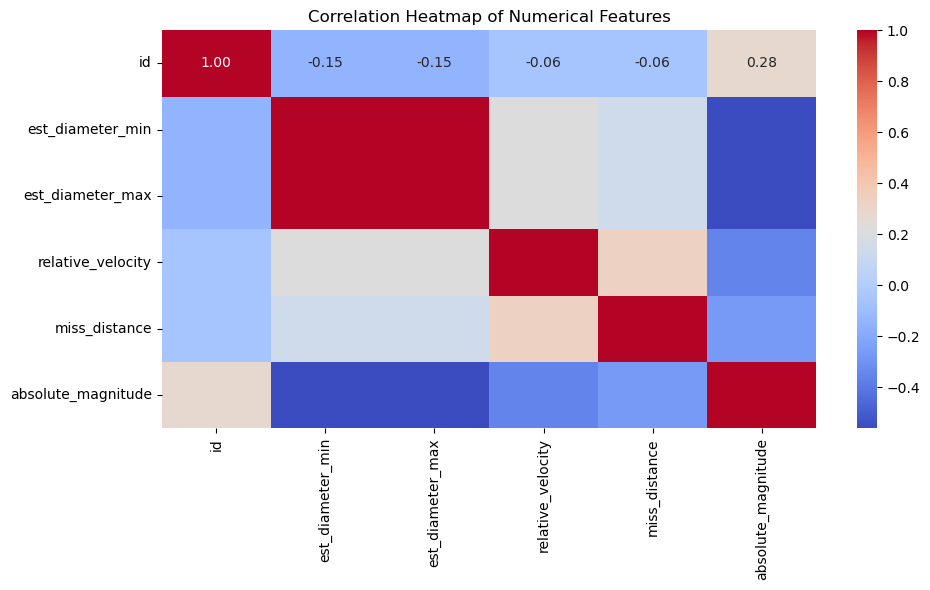

In [9]:
plt.figure(figsize=(10, 6))
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()

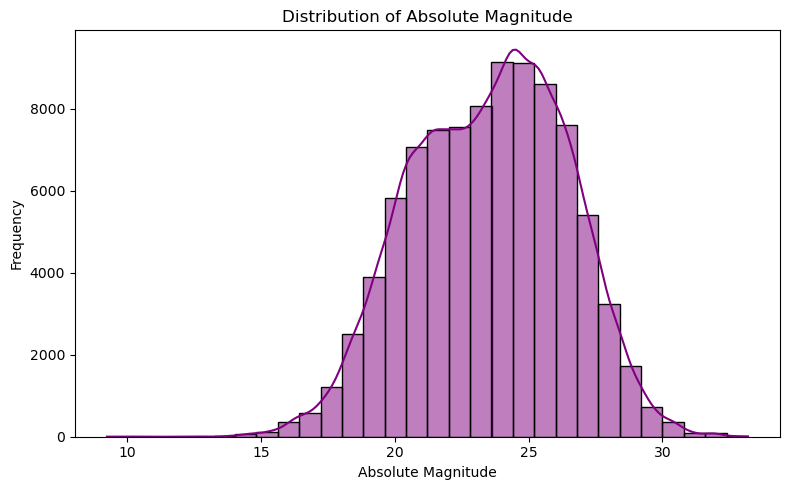

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df['absolute_magnitude'], bins=30, kde=True, color='purple')
plt.title('Distribution of Absolute Magnitude')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig("absolute_magnitude_hist.png")
plt.show()


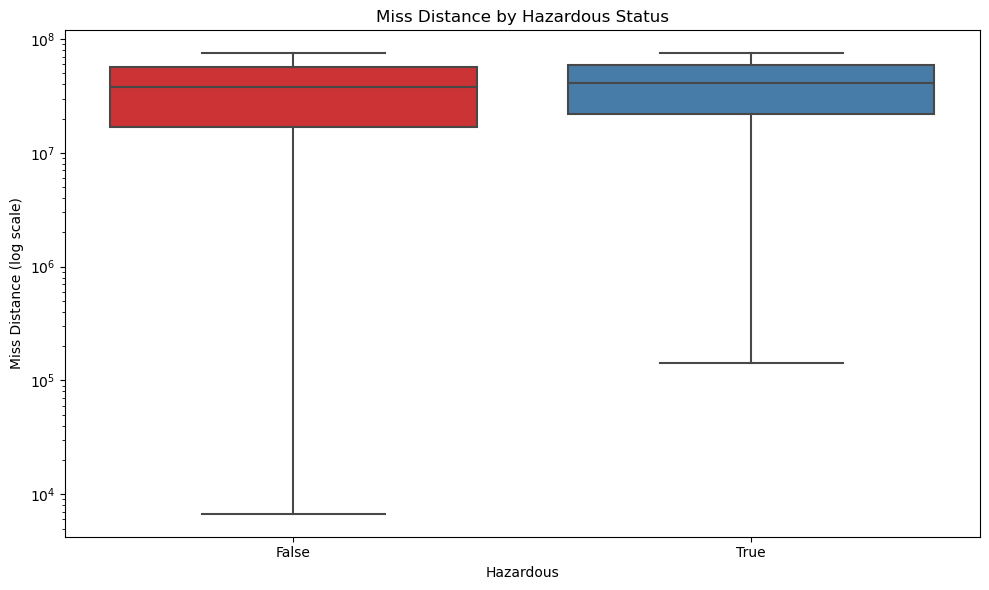

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='hazardous', y='miss_distance', palette='Set1')
plt.yscale('log')  # log scale to handle outliers
plt.title('Miss Distance by Hazardous Status')
plt.xlabel('Hazardous')
plt.ylabel('Miss Distance (log scale)')
plt.tight_layout()
plt.savefig("miss_distance_boxplot.png")
plt.show()


# Pivot Tables

In [12]:
pivot1 = pd.pivot_table(df, values='id', index='orbiting_body', columns='hazardous', aggfunc='count', fill_value=0)
print("\n🔹 Pivot Table 1: Count of NEOs by Orbiting Body and Hazardous Status")
print(pivot1)


🔹 Pivot Table 1: Count of NEOs by Orbiting Body and Hazardous Status
hazardous      False  True 
orbiting_body              
Earth          81996   8840


In [13]:
pivot3 = pd.pivot_table(df, values='relative_velocity', index='hazardous', columns='orbiting_body', aggfunc='max')
print("\n🔹 Pivot Table 3: Max Relative Velocity by Hazardous & Orbiting Body")
print(pivot3)



🔹 Pivot Table 3: Max Relative Velocity by Hazardous & Orbiting Body
orbiting_body          Earth
hazardous                   
False          236990.128088
True           193386.975218


In [14]:
cat_cols = df.select_dtypes(include=['object', 'bool']).columns

In [15]:
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [16]:
label_enc = LabelEncoder()
binary_cols = [col for col in cat_cols if df[col].nunique() == 2]

In [17]:
for col in binary_cols:
    df[col] = label_enc.fit_transform(df[col])

In [18]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [19]:
standard_scaler = StandardScaler()

In [20]:
df_std_scaled = df.copy()
df_std_scaled[num_cols] = standard_scaler.fit_transform(df_std_scaled[num_cols])

In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, Normalizer

In [22]:
minmax_scaler = MinMaxScaler()

In [23]:
df_minmax_scaled = df.copy()
df_minmax_scaled[num_cols] = minmax_scaler.fit_transform(df_minmax_scaled[num_cols])

In [24]:
robust_scaler = RobustScaler()
df_robust_scaled = df.copy()
df_robust_scaled[num_cols] = robust_scaler.fit_transform(df_robust_scaled[num_cols])

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


In [27]:
target_col = 'hazardous'

df = df.dropna(subset=[target_col])

In [28]:
X = df.drop(columns=[target_col])
y = df[target_col]

In [29]:
X = X.select_dtypes(include=['number'])


In [31]:
 from sklearn.preprocessing import LabelEncoder


In [32]:
y = LabelEncoder().fit_transform(y)


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     16439
           1       0.42      0.16      0.23      1729

    accuracy                           0.90     18168
   macro avg       0.67      0.57      0.59     18168
weighted avg       0.87      0.90      0.88     18168



# Gaussian NB

In [36]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print("\nGaussian NB Classification Report:\n", classification_report(y_test, y_pred_gnb))


Gaussian NB Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     16439
           1       0.29      0.07      0.11      1729

    accuracy                           0.90     18168
   macro avg       0.60      0.53      0.53     18168
weighted avg       0.85      0.90      0.87     18168



# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(max_iter=1000)
logr.fit(X_train, y_train)
y_pred_logr = logr.predict(X_test)
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_logr))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     16439
           1       0.00      0.00      0.00      1729

    accuracy                           0.90     18168
   macro avg       0.45      0.50      0.48     18168
weighted avg       0.82      0.90      0.86     18168



# SVM

In [38]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))



SVM Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     16439
           1       0.00      0.00      0.00      1729

    accuracy                           0.90     18168
   macro avg       0.45      0.50      0.48     18168
weighted avg       0.82      0.90      0.86     18168



# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))



Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96     16439
           1       0.65      0.69      0.67      1729

    accuracy                           0.93     18168
   macro avg       0.81      0.82      0.81     18168
weighted avg       0.94      0.93      0.94     18168



# Random forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))



Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     16439
           1       0.87      0.63      0.73      1729

    accuracy                           0.96     18168
   macro avg       0.91      0.81      0.85     18168
weighted avg       0.95      0.96      0.95     18168



# Ada Boost

In [41]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print("\nAdaBoost Classification Report:\n", classification_report(y_test, y_pred_ada))



AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     16439
           1       0.71      0.23      0.35      1729

    accuracy                           0.92     18168
   macro avg       0.82      0.61      0.65     18168
weighted avg       0.90      0.92      0.90     18168



# Gradient Boost

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("\nGradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     16439
           1       0.80      0.25      0.39      1729

    accuracy                           0.92     18168
   macro avg       0.86      0.62      0.67     18168
weighted avg       0.91      0.92      0.90     18168



# XG Boost

In [43]:
from xgboost import XGBClassifier
xb =XGBClassifier()
xb.fit(X_train, y_train)
y_pred_gb = xb.predict(X_test)
print("\nGradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     16439
           1       0.81      0.44      0.57      1729

    accuracy                           0.94     18168
   macro avg       0.88      0.72      0.77     18168
weighted avg       0.93      0.94      0.93     18168



# Observation

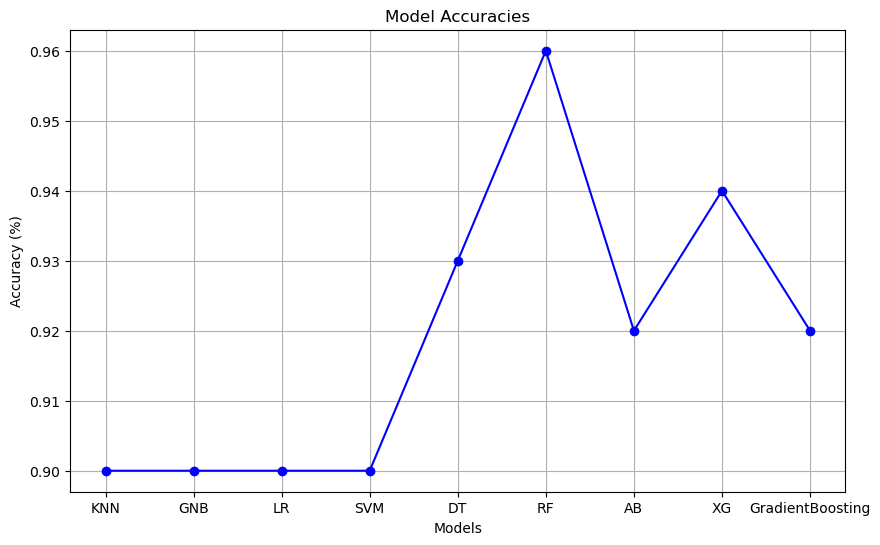

In [49]:
models = ['KNN', 'GNB', 'LR', 'SVM', 'DT', 'RF', 'AB', 'XG', 'GradientBoosting']
accuracies = [0.90,0.90,0.90,0.90,0.93,0.96,0.92,0.94,0.92]
plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', linestyle='-', color='b')
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()